# Extension of Second Lab Session: Closed Form Expressions 1D Solutions

In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"% plt.__name__)

Succesfully imported numpy -- Version: 1.21.6
Succesfully imported scipy -- Version: 1.7.3
Succesfully imported sympy -- Version: 1.8
Succesfully imported matplotlib.pyplot


The computed solution is Piecewise((-x**2/2 + x/20, Abs(x - 0.5) < 0.1), (-x**2/20 + x/20, True))


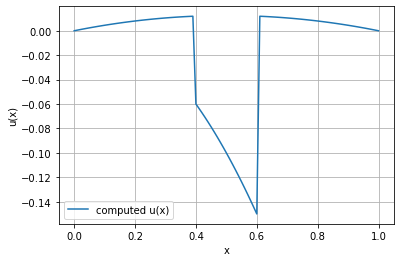

In [32]:
#..define symbol x (spatial coordinate), function f (source) and function u (unknown)
x = sym.symbols('x')
f = sym.Function("f")
u = sym.Function("u") 

#..define the expression for the right-hand side function 
f = sym.Piecewise((1, abs(x-.5)<0.1),(.1,True))
#f = sym.Piecewise((1, abs(x-.4)<.05),(0,True)) + sym.Piecewise((-1, abs(x-.6)<.05),(0,True))

#..solve the differential equation - u''(x) = f(x) + BC symbolically
computed = sym.dsolve(sym.Derivative(u(x), x, x) + f,ics={u(0):0,u(1):0})

#..print the expression for the symbolic solution 
print("The computed solution is", computed.rhs)

#..to switch from symbolic to numerical computation
#..we need to perform a "lambdification" of the right-hand side of the solution
#..the function created accepts vector arguments 
computed_sol = sym.lambdify(x, computed.rhs)
#computed_sol = sym.lambdify(x, f)

#..sample the lambda expression for the computed solution 
N = 100; Np1 = N+1;  
xvec = np.linspace(0,1,Np1)
computed_sol_vec = computed_sol(xvec)

#..plot the computed solution 
plt.plot(xvec,computed_sol_vec,label='computed u(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend(loc='best')
plt.grid()
plt.show()